In [1]:
import pandas as pd
summed_by_date = pd.read_csv('../Data_And_Data_Creation/advanced_welcome_table_summed.csv')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
summed_by_date = summed_by_date.drop([108,71])

summed_by_date.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

summed_by_date.set_index('Date', inplace=True)

grouped =  summed_by_date.groupby("day")

Tuesdays = grouped.get_group(1)
Thursdays =  grouped.get_group(3)
Saturdays = grouped.get_group(5)
Sundays = grouped.get_group(6)

summed_by_day_list = [Tuesdays, Thursdays, Saturdays, Sundays]
days = ["Tuesdays", "Thursdays", "Saturdays", "Sundays"]
#items_checked = ['total_visitors', 'from_11201', 'total_new', 'total_returns', 'ratio_11201']
items_checked = ['avg_visits_per_hour', 'avg_from_11201_per_hour', 'avg_new_per_hour', 'avg_returns_per_hour', 'ratio_11201']
item_names = ['Average Visitors Per Hour', 'Average Visitors From 11201 Per Hour', 'Average New Visitors Per Hour', "Average Returning Visitors Per Hour", "Ratio of 11201 to Total Visitors"]

In [2]:
from matplotlib.backends.backend_pdf import PdfPages

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=True).mean()
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=True).mean()
C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


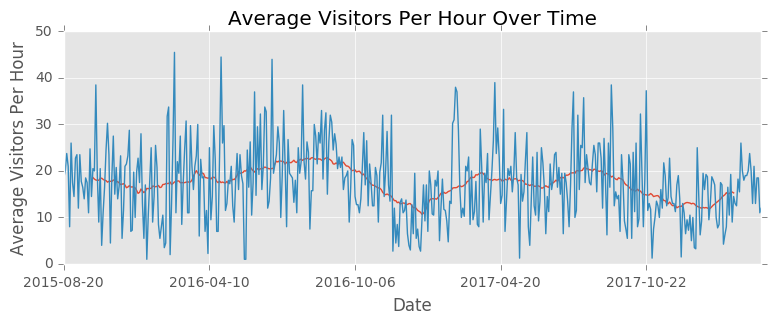

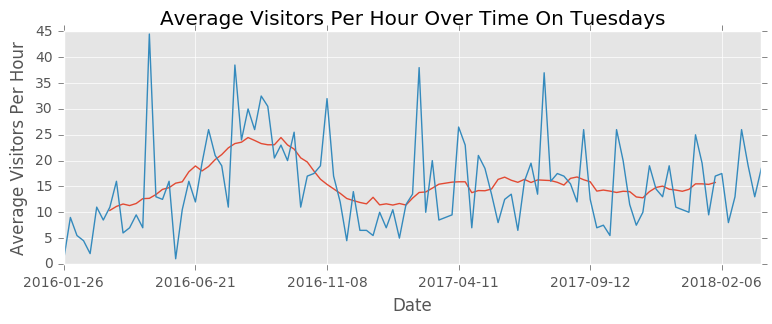

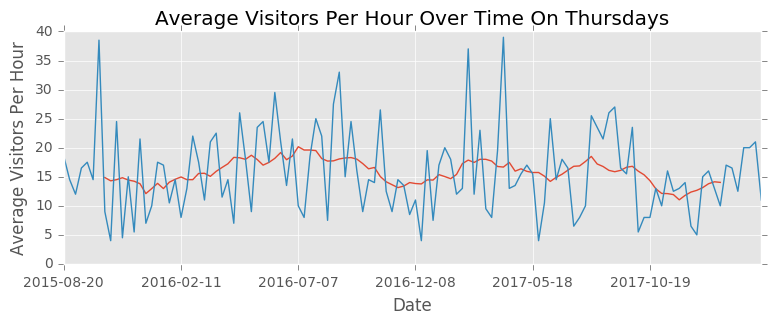

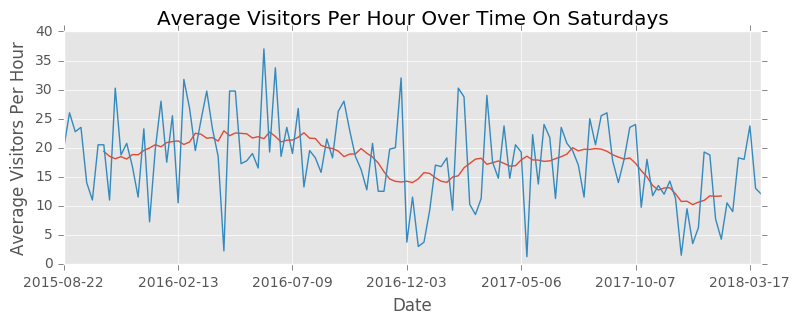

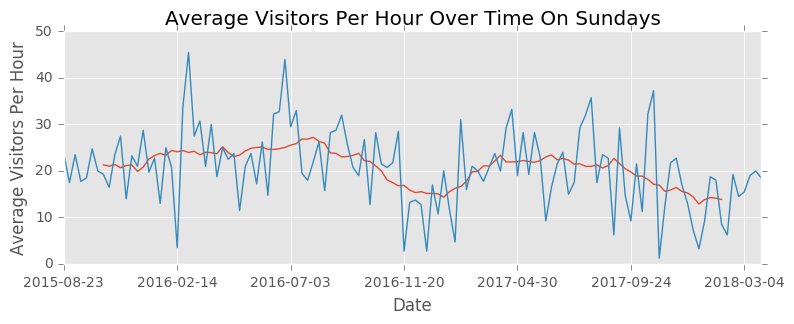

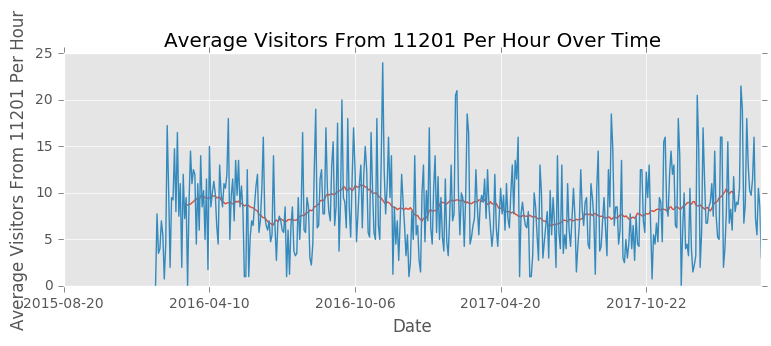

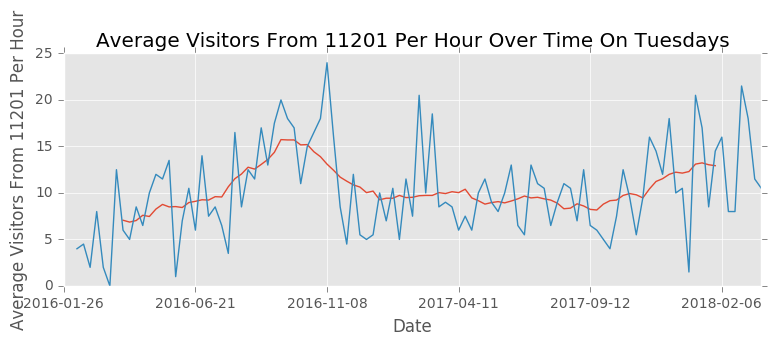

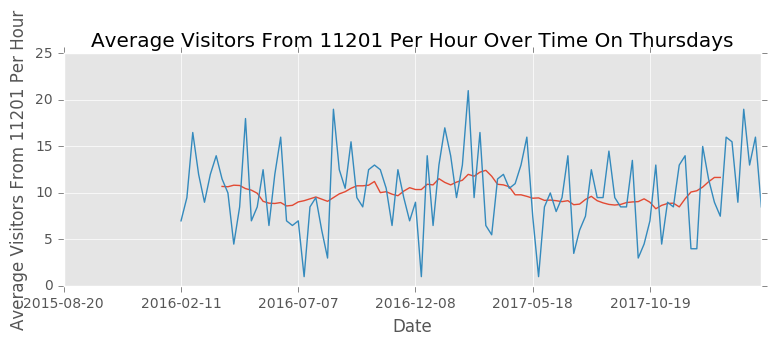

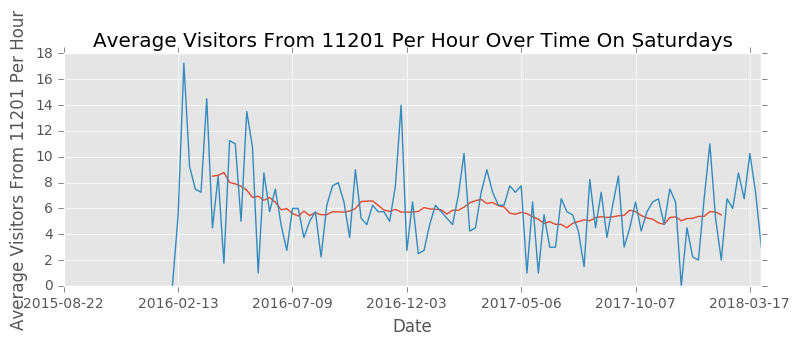

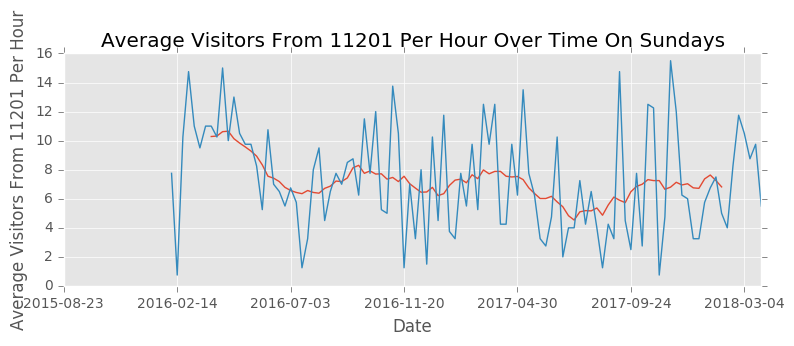

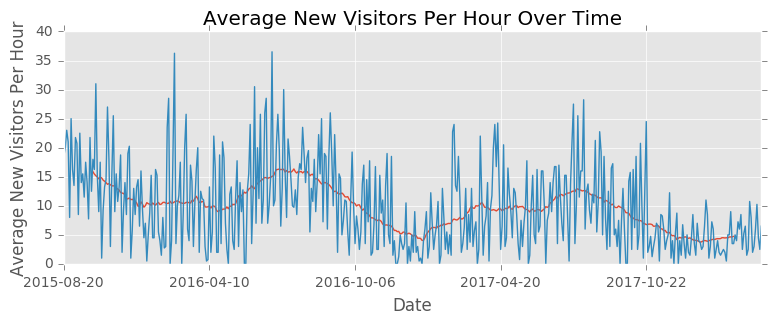

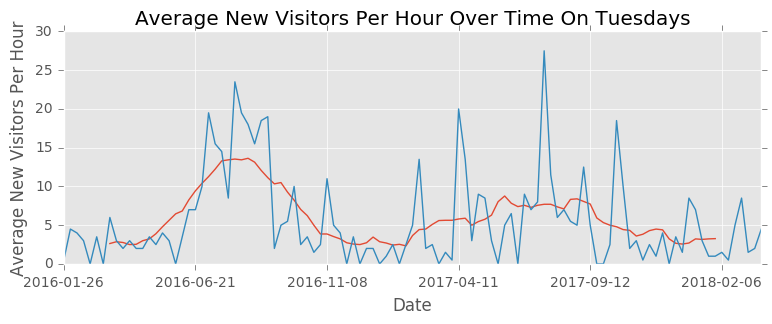

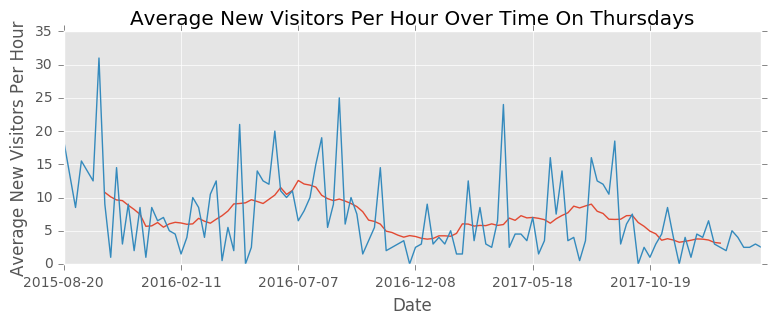

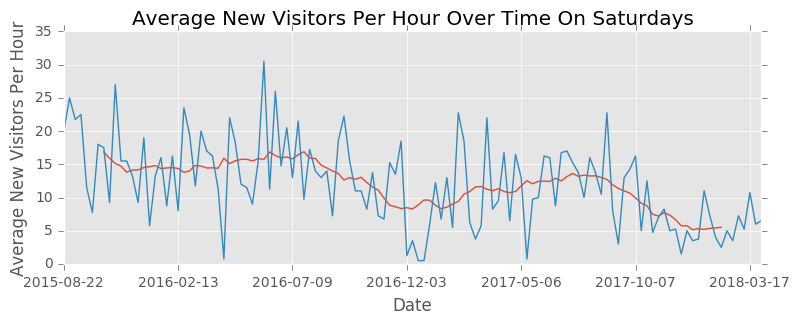

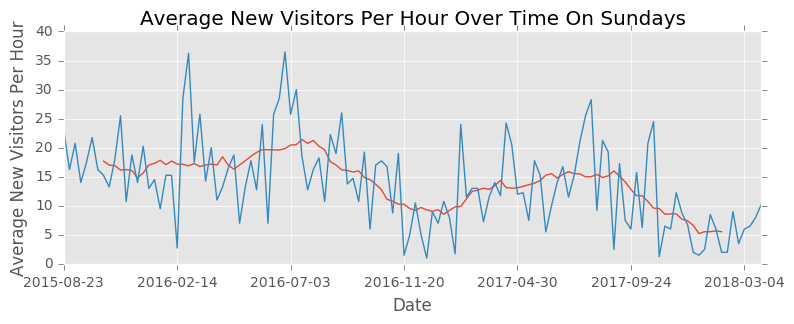

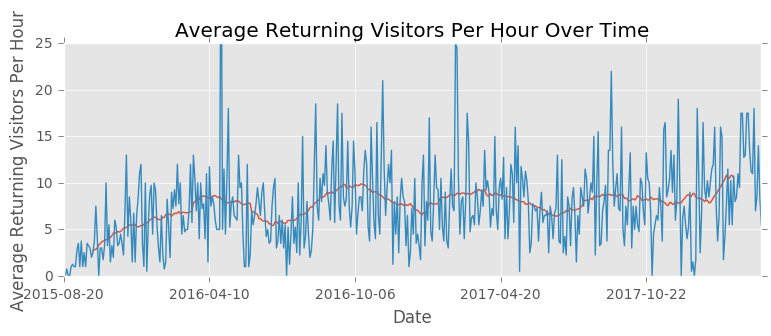

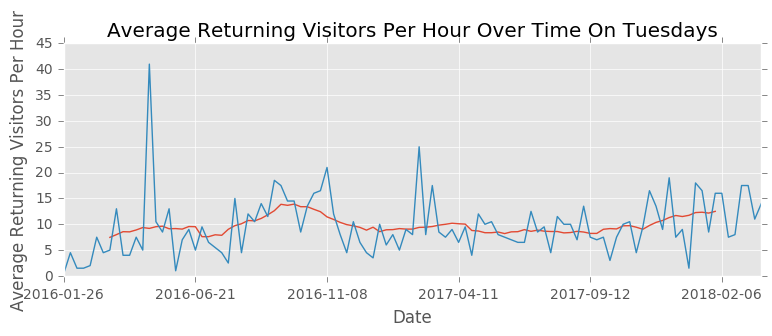

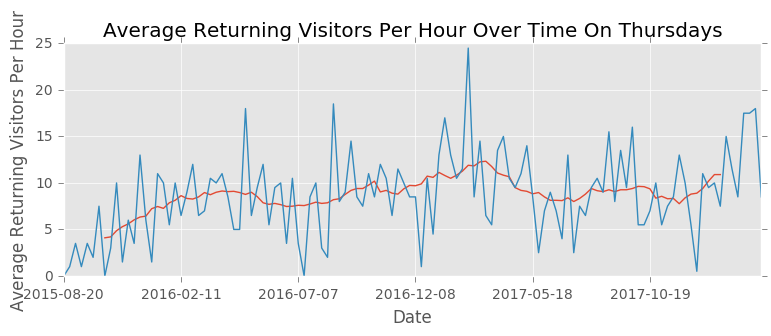

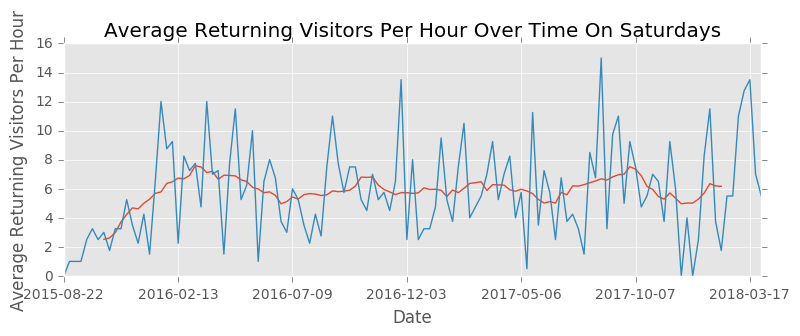

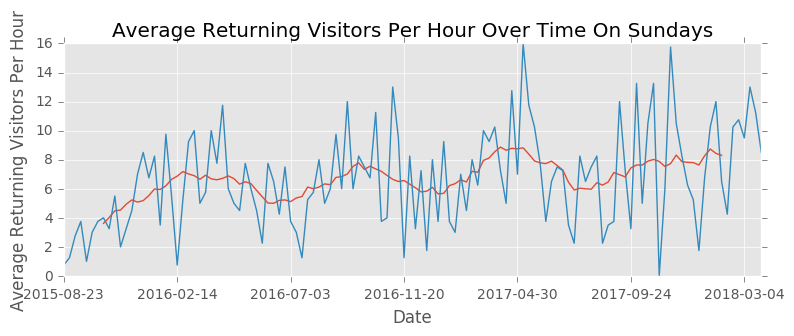

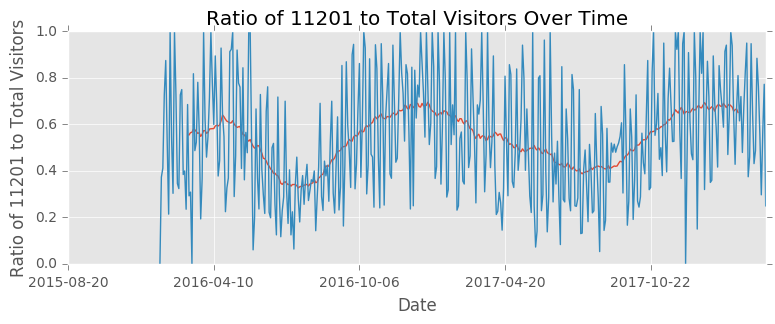

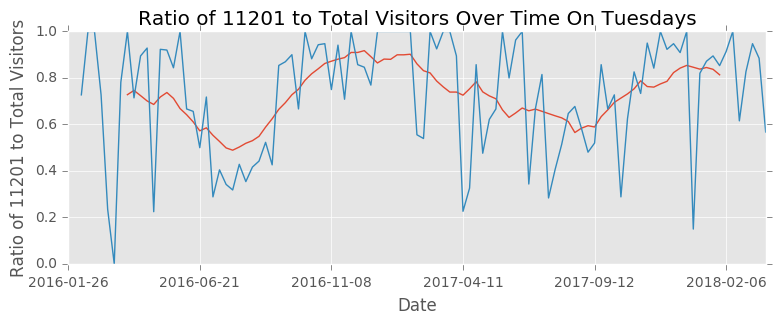

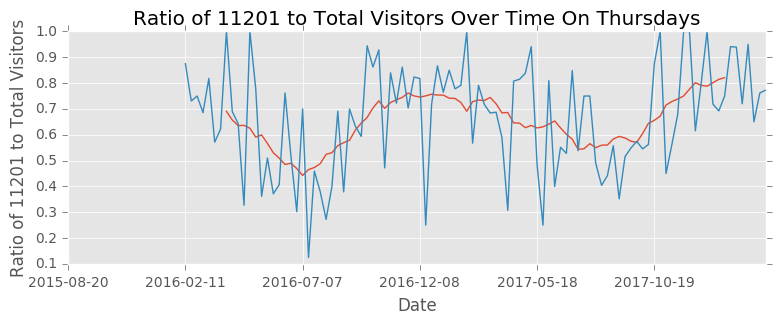

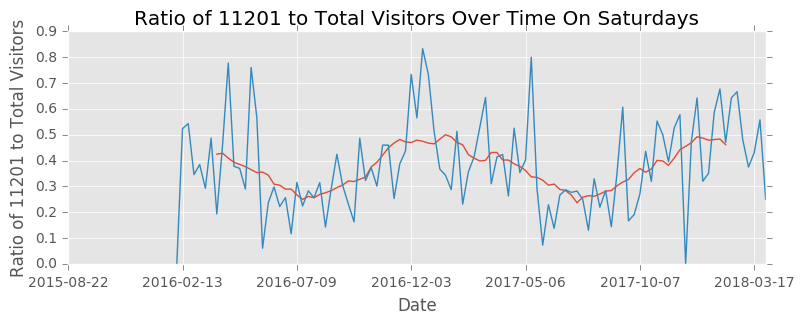

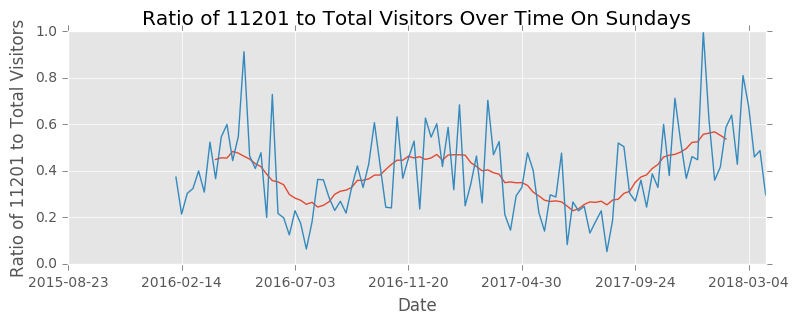

In [3]:
count = 0
i = 0
for item in items_checked:
    plt.figure(figsize=(9,3))
    ax = pd.rolling_mean(summed_by_date[item], 40, center=True).plot(title= item_names[count] + " Over Time")
    ax = summed_by_date[item].plot(title= item_names[count] + " Over Time")
    ax.set_ylabel(item_names[count])
    idx = 0
    if item == 'ratio_11201':
        fig = ax.get_figure()
        fig.savefig('../Figures/Ratio_11201')
    if item == 'avg_visits_per_hour':
        fig = ax.get_figure()
        fig.savefig('../Figures/Avg_Visitors_Per_Hour')
    if item == 'avg_new_per_hour':
        fig = ax.get_figure()
        fig.savefig('../Figures/Avg_New_Per_Hour')
    if item == 'avg_returns_per_hour':
        ax.set_ylim(0,25)
        fig = ax.get_figure()
        fig.savefig('../Figures/Avg_Returns_Per_Hour')
    if item == 'avg_from_11201_per_hour':
        fig = ax.get_figure()
        fig.savefig('../Figures/Avg_From_11201_Per_Hour')
    pp = PdfPages(item +"PerDay.pdf")
    pp.savefig(fig)
    figs = []
    for day in summed_by_day_list:
        plt.figure(figsize=(9,3))
        ax = pd.rolling_mean(day[item], 15, center=True).plot(title= item_names[count] + " Over Time On " + days[idx])
        ax = day[item].plot(title= item_names[count] + " Over Time On " + days[idx])
        ax.set_ylabel(item_names[count])
        idx += 1
        figs.append(ax.get_figure())
    #pp = PdfPages(item +"PerDay.pdf")
    for fig in figs:
        pp.savefig(fig)
    pp.close()
    count += 1